## DSA5105 Project: Predicting healthcare costs of patients
### Yeo Huai Zhe (A0206224U)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### For this project we will be exploring two types of machine learning tasks related to the cost of healthcare given patients with certain attributes
1. Perform data cleaning and some visualization to further understand the dataset
2. Perform supervised regression analysis to predict the costs of healthcare
3. Perform unsupervised regression analysis to try to cluster patients in to various groups

The following variables were included within the dataset

1. Age (Ordinal Variable)
2. Sex (Categorical Binary Variable)
3. BMI (Numerical Variable)
4. Children (Binary Variable)
5. Smoker (Binary Variable)
6. Region (Categorical Variable)
7. Charges (Numerical Variable)

At a glance, we would probably need to perform encoding for the categorical variables represented by strings. Apply binary encoding to the sex and smoker variable and apply one-hot encoding to the region variable after data exploration.

In [2]:
df = pd.read_csv("dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Null values represent that the data is missing and are considered undesirable in the dataset. Fortunately, this dataset does not contain any null values and hence no further action is required to get rid of null values.

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Let's take a look at the distribution of the charges to kind of get an idea of how the costs are distributed across the dataset and see if there are any differences between smokers and non smokers. It seems like the distribution is a left skewed distribution with most of the charges being in the 1000 to 12000 range. This is not desirable as a skewed t distribution, for example, depends on several factors such as the skew, kurtosis, mean, and standard deviation. On the other hand, a gaussian distribution sole depends on the mean and standard deviation, which would make forecasting a much more simpler job. Let's see if we can transform the data such that it follows a gaussian distribution

<AxesSubplot:ylabel='Frequency'>

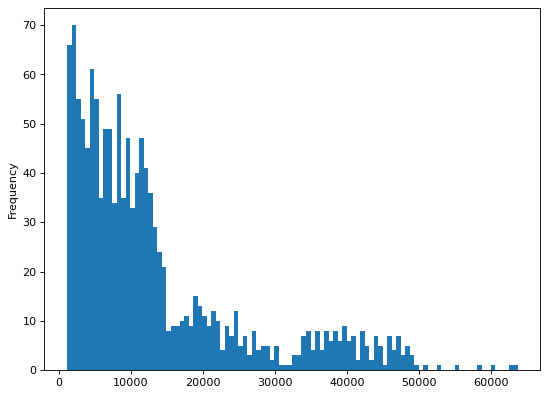

In [4]:
plt.figure(figsize=(8, 6), dpi=80)
df["charges"].plot.hist(bins=100)

The distribution of the log charges seems to follow a normal distribution more closely!

<AxesSubplot:xlabel='logcharges', ylabel='Count'>

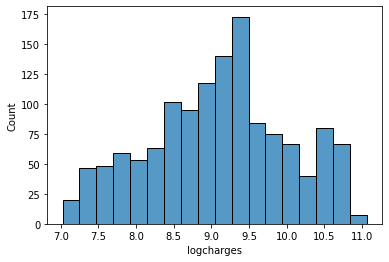

In [5]:
df["logcharges"] = np.log(df["charges"])
sns.histplot(df["logcharges"])

We can definitely see that smoking plays a large role in increasing the charges, however, are there any disparities between the counts?

<AxesSubplot:xlabel='smoker', ylabel='charges'>

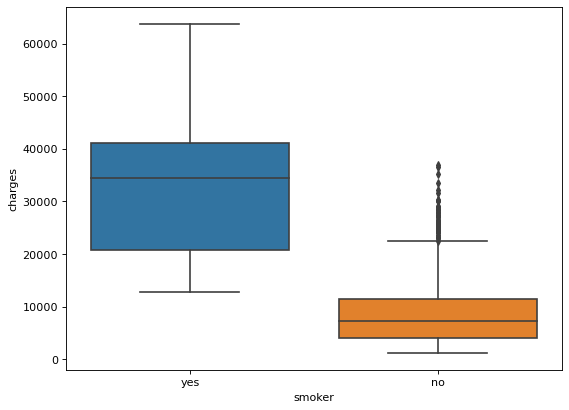

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data=df, x = 'smoker', y = 'charges')

Seems like the genders are pretty well-balanced but there seems to be alot more non-smokers than smokers in this dataset. It also seems like males tend to smoke more than females in this dataset. 

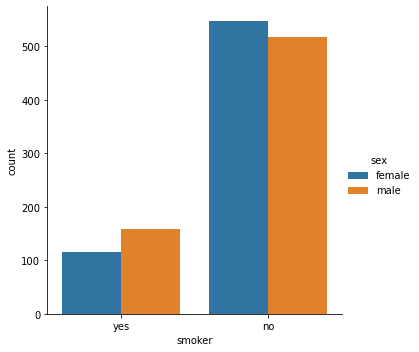

In [7]:
sns.catplot(data=df, x='smoker', kind="count", hue='sex')

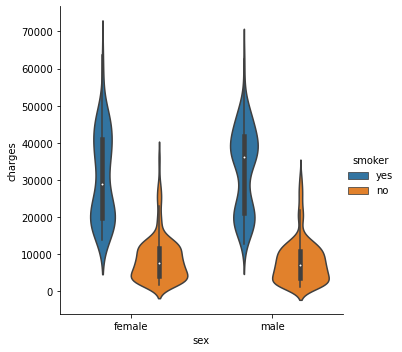

In [8]:
sns.catplot(x="sex", y="charges",kind='violin', hue="smoker", data=df)

Comparison of costs between female smokers and non-smokers

<AxesSubplot:xlabel='smoker', ylabel='charges'>

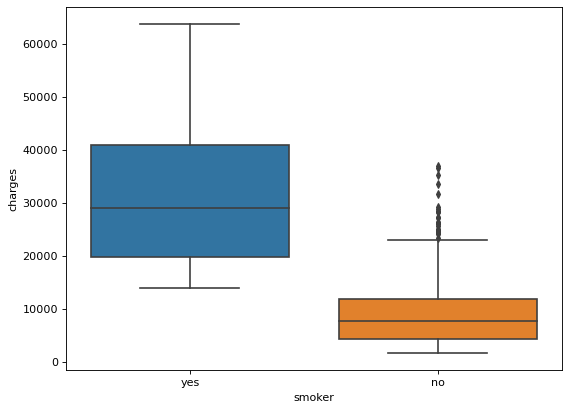

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data=df[df['sex']=='female'], x='smoker', y='charges')

It does seem like male smokers do get charged a higher fee on average

<AxesSubplot:xlabel='smoker', ylabel='charges'>

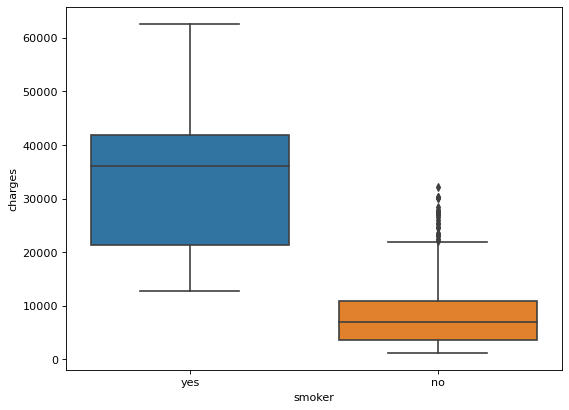

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
sns.boxplot(data=df[df['sex']=='male'], x='smoker', y='charges', order=['yes','no'])

Now that we have a better understanding on the gender and smoker variable, lets explore other variables such as the age and BMI

From the histogram, we can observe that frequency of individuals aged 20 and below make up a large proportion of the samples

<AxesSubplot:ylabel='Frequency'>

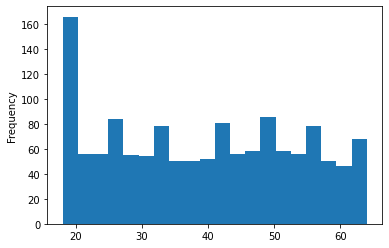

In [11]:
df["age"].plot.hist(bins=20)

Lets see if there are any trends between the age and the costs:
1. We can see that across all ages, smokers definitely get charged a higher fee
2. By splitting the data between smokers and non-smokers, we can see that there is an obvious trend that the costs increase with age for non-smokers
3. However, for smoker, the trend is much less obvious but we can still observe an increasing trend of the charges with age.

<AxesSubplot:xlabel='age', ylabel='charges'>

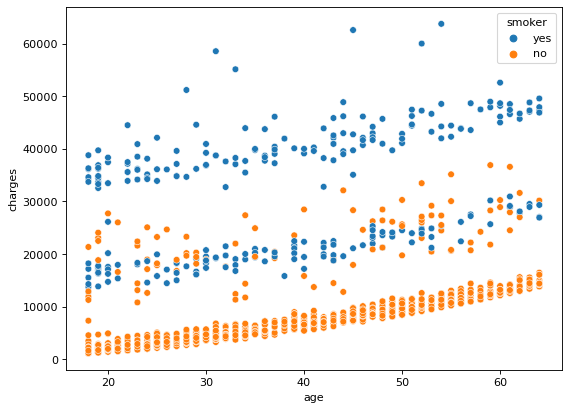

In [12]:
plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

We can see that the average BMI of the sample size is unimodal at about 25-30, which is definitely on the higher side

<AxesSubplot:ylabel='Frequency'>

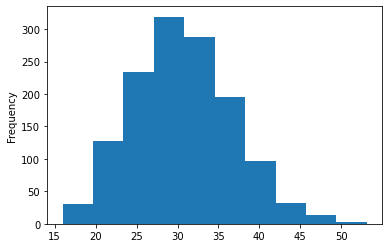

In [13]:
df['bmi'].plot.hist()

There does not seem to be an obvious trend for the non-smokers but for smokers, we can see that individuals with a BMI of more than 30 tend to be charged higher.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

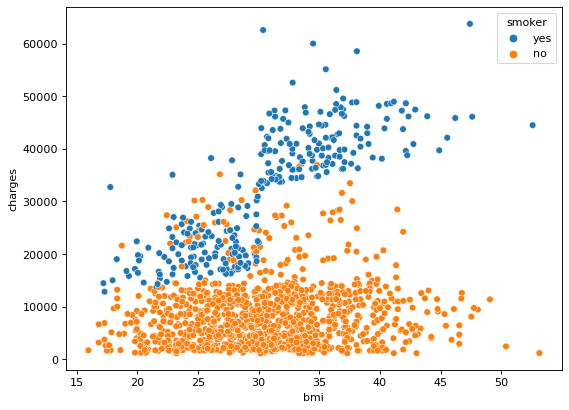

In [14]:
plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

### Let us now take a look at the number of children and the charges
1. It seems like people with more children tend to smoke less
2. There seems to be not many differences between 

<AxesSubplot:xlabel='children', ylabel='charges'>

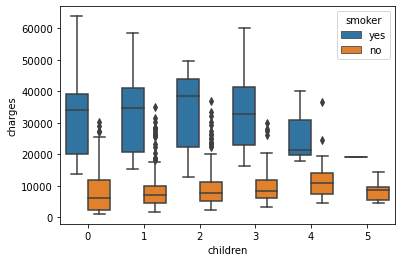

In [15]:
sns.boxplot(data=df, x="children",y="charges",hue="smoker")

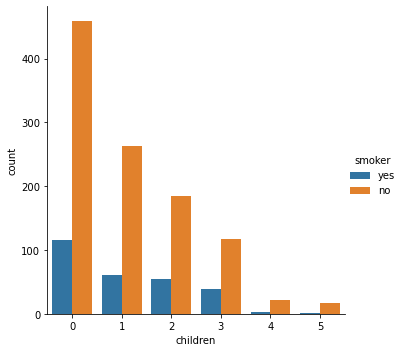

In [16]:
sns.catplot(data=df,x='children',kind='count', hue='smoker')

The region does not seem to play a big role in affecting the hospital charges

<AxesSubplot:xlabel='region', ylabel='charges'>

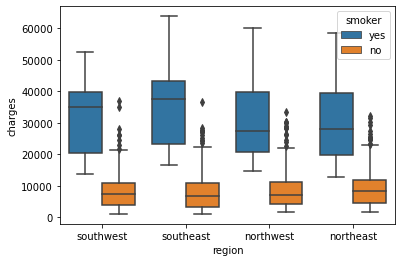

In [17]:
sns.boxplot(data=df, x="region",y="charges",hue="smoker")

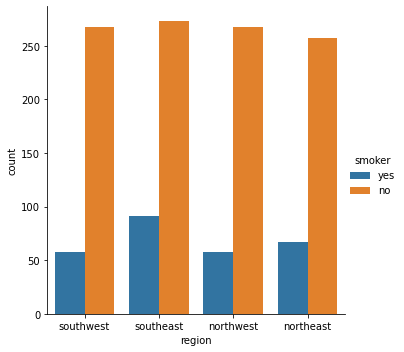

In [18]:
sns.catplot(data=df,x='region',kind='count', hue='smoker')

Encode the numerical variables

In [19]:
#Binary encoding the sex attribute
df["sex"].replace('male',1, inplace=True)
df["sex"].replace('female',0, inplace=True)

#Binary encoding the smoker attribute
df["smoker"].replace('yes',1, inplace=True)
df["smoker"].replace('no',0, inplace=True)

#one hot encoding the region attribute
one_hot = pd.get_dummies(df["region"])
df = df.drop('region', axis=1)
df = df.join(one_hot)
df

,age,sex,bmi,children,smoker,charges,logcharges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,9.734176,0,0,0,1
1,18,1,33.770,1,0,1725.55230,7.453302,0,0,1,0
2,28,1,33.000,3,0,4449.46200,8.400538,0,0,1,0
3,33,1,22.705,0,0,21984.47061,9.998092,0,1,0,0
4,32,1,28.880,0,0,3866.85520,8.260197,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,9.268661,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,7.698927,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,7.396233,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,7.604867,0,0,0,1


## Lets check our the correlation plot for the variables
1. Intuitively, we would expect the BMI, age, and smoker variables to significantly affect the charges
2. However, from the correlation plots, we can see that, in fact, only whether or not the patient smokes has a significant impact

<AxesSubplot:>

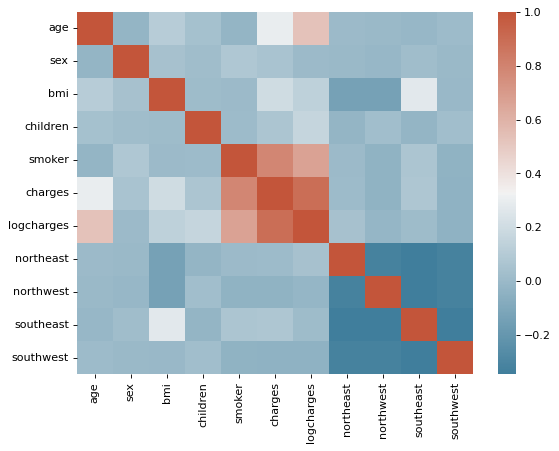

In [20]:
plt.figure(figsize=(8, 6), dpi=80)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(),  cmap=cmap)

### Lets start performing the regression using a couple of machine learning models
1. As there are quite little numerical variables, and the magnitude between these 2 variables are quite similar, there is no need to standardize the data
2. The MAE, MSE, and MAPE will be used as the evaluation metrics to determine the best model for this dataset
3. Perform 5-fold cross validation to determine the best model using the metrics performances of the validation scores
4. Compare between linear regression, randomforest regressor, xgboost and FCNN

In [21]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(df, random_state = 1)

In [73]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

metrics = {
    "MAE"  : mean_absolute_error,
    "MSE" : mean_squared_error,
    "MAPE"    : mean_absolute_percentage_error,
}
        
def train_model(model, n_splits=5):
    
    X, y = train.drop(columns=['charges','logcharges']), train['logcharges']

    train_metrics = {x : [] for x in metrics.keys()}
    test_metrics = {x : [] for x in metrics.keys()}

    skf = KFold(n_splits=n_splits, shuffle=True)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index].copy(), X.iloc[test_index].copy()
        y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
        
        
        model.fit(X_train.values, y_train)
        
        y_train_pred = model.predict(X_train.values)
        y_test_pred = model.predict(X_test.values)
        
        for metric, fn in metrics.items():
            train_metrics[metric].append(fn(y_train, y_train_pred))
            test_metrics[metric].append(fn(y_test, y_test_pred))
            
    for k in metrics.keys():
        train_metrics[k] = np.mean(train_metrics[k]).round(2)
        test_metrics[k] = np.mean(test_metrics[k]).round(2)
        
    print("Train:".ljust(8), train_metrics)
    print("Val:".ljust(8), test_metrics)
        
    return train_metrics, test_metrics
    

In [74]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
train_metrics, test_metrics = train_model(model)

Train:   {'MAE': 0.28, 'MSE': 0.2, 'MAPE': 0.03}
Val:     {'MAE': 0.29, 'MSE': 0.21, 'MAPE': 0.03}


The R2 value seems pretty good just by using linear regression already!

In [75]:
results = model.predict(test.drop(columns=['logcharges','charges']).values)
model.score(test.drop(columns=['logcharges','charges']).values,test["logcharges"])

0.7811055924918712

Now let's try some ensembling methods such as the random forest regressor 

In [76]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
train_metrics, test_metrics = train_model(model)

Train:   {'MAE': 0.08, 'MSE': 0.02, 'MAPE': 0.01}
Val:     {'MAE': 0.22, 'MSE': 0.17, 'MAPE': 0.02}


In [77]:
results = model.predict(test.drop(columns=['logcharges','charges']).values)
model.score(test.drop(columns=['logcharges','charges']).values,test["logcharges"])

0.8368709551185809

Lets try gradient boosting methods like XGBoost as well

In [84]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=30, max_depth=3)
train_metrics, test_metrics = train_model(xgb_model)

Train:   {'MAE': 0.17, 'MSE': 0.1, 'MAPE': 0.02}
Val:     {'MAE': 0.22, 'MSE': 0.16, 'MAPE': 0.02}


In [85]:
results = xgb_model.predict(test.drop(columns=['logcharges','charges']).values)
xgb_model.score(test.drop(columns=['logcharges','charges']).values,test["logcharges"])

0.8474646494715172

Finally, lets use the MLP regressor to see if deep learning solutions perform better

In [82]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(early_stopping=True, max_iter = 300)
train_metrics, test_metrics = train_model(model)

C:\Users\XiaotaoO\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Train:   {'MAE': 0.23, 'MSE': 0.16, 'MAPE': 0.03}
Val:     {'MAE': 0.25, 'MSE': 0.18, 'MAPE': 0.03}


C:\Users\XiaotaoO\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [83]:
results = model.predict(test.drop(columns=['logcharges','charges']).values)
model.score(test.drop(columns=['logcharges','charges']).values,test["logcharges"])

0.8321423299129986

As the dataset is relatively simple, it would make sense that most models perform pretty well in terms of regressing the log transformed charges without extensive hyperparameter tuning. Out of all the models, the XGBoost Regressor performed the best with the given hyperparameters. However, given the complex nature of the XGBoost model, it is difficult to interpret the results for the stakeholders. Fortunately, methods such as using the Shapley values helps us explain the feature importance of the XGBoost model. Let's take a look!

In [87]:
import shap
shap.initjs()

In [88]:
X_sampled = train.drop(columns=['charges','logcharges']).sample(100, random_state=10)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_sampled)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


It seems like the smoker and age variables are the two largest contributors in determining the hospitalization charges of these patients. This is consistent with the data exploration exercise which we conducted earlier on!

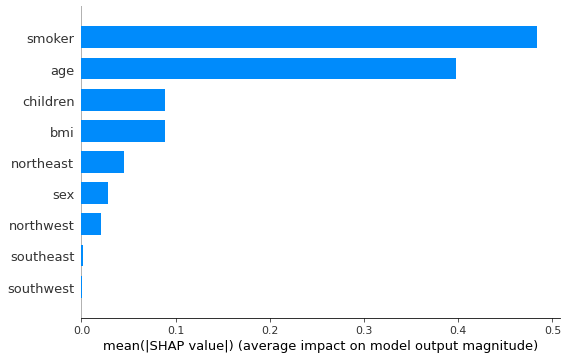

In [90]:
shap.summary_plot(shap_values, X_sampled, plot_type = "bar")

### Now lets do some clustering analysis for the unsupervised learning task
Being able to cluster potential customers into segments can potentially help insurance health assessments to assign people into various clusters of varying risks, thus helping insurance companies better plan and offer policies in an informed manner

In [31]:
#Let's start from scratch again by loading the data
df = pd.read_csv("dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Lets bin the ages into approximately equal clusters as such:

Ages 18-35: Young Adults (505)

Ages 35-55: Adults (548)

Ages > 55: Seniors (216)

In [32]:
#Binning the ages into categories so that we can perform manual clustering analysis
df["age_cat"] = pd.cut(df["age"], bins=[15, 35, 55, float("inf")], labels=["Young Adult", "Adults", "Seniors"])

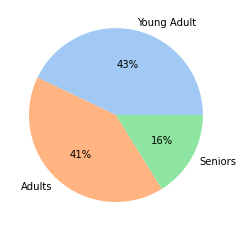

In [33]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df.groupby(["age_cat"]).count().reset_index()["age"], labels=["Young Adult", "Adults", "Seniors"],colors = colors, autopct='%.0f%%')
plt.show()

Now lets bin the BMI into individual classificiations as such:

BMI less than 18: Underweight

BMI between 18 and 25: Healthy

BMI between 25 and 30 : Overweight

BMI above 30: Obese

In [34]:
df["bmi_cat"] = pd.cut(df["bmi"], bins=[0, 18, 25, 30, float("inf")], labels=["Underweight", "Healthy", "Overweight", "Obese"])

Seems like there are very little underweight individuals within the dataset

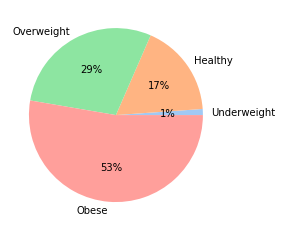

In [35]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df.groupby(["bmi_cat"]).count().reset_index()["age"], labels=["Underweight", "Healthy", "Overweight", "Obese"],colors = colors, autopct='%.0f%%')
plt.show()

Lets start by visualizing some of the manual clustering on the charges, lets take a look at the age and bmi

1. It seems that for the age, there seems to be a dense cluster forming at the bottom while for the others, it seems to be randomly scattered
2. For the bmi plot, there seems to be one cluster at the top right 
3. Are these clusters formed by the smoking cluster?

Text(0.5, 1.0, 'Relationship between Charges and age by Age Category')

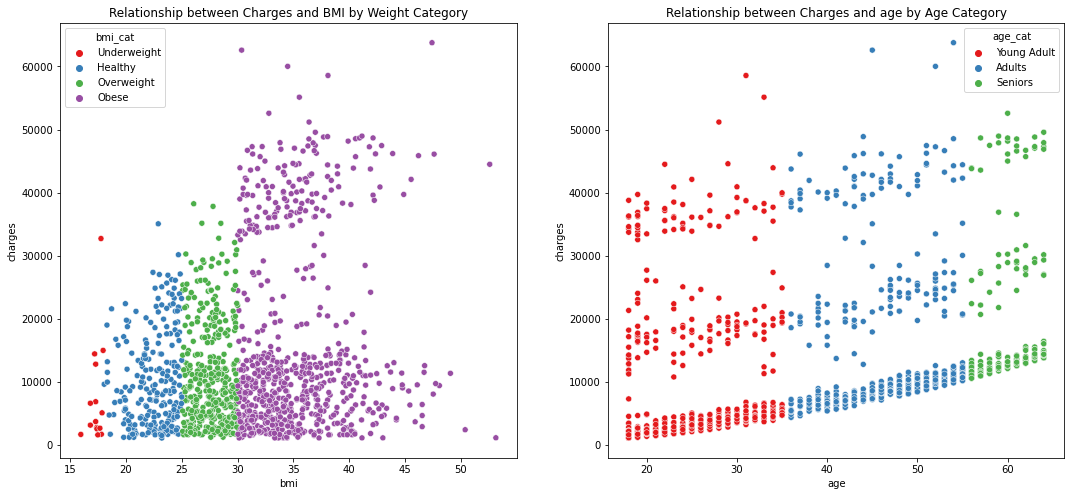

In [36]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="bmi_cat", data=df, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by Weight Category")

sns.scatterplot(x="age", y="charges", hue="age_cat", data=df, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and age by Age Category")


It does seem like smoking is the predominant factor in determining the charges

Text(0.5, 1.0, 'Relationship between Charges and age by smoking')

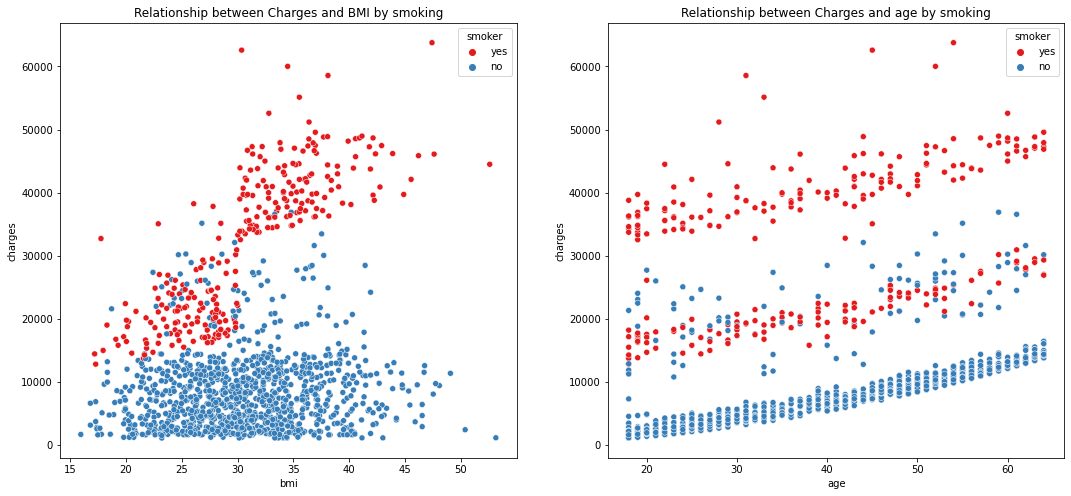

In [37]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by smoking")

sns.scatterplot(x="age", y="charges", hue="smoker", data=df, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and age by smoking")

Is there a difference in terms of the region?

Does not seem like the region is a strong determinant

Text(0.5, 1.0, 'Relationship between Charges and age by region')

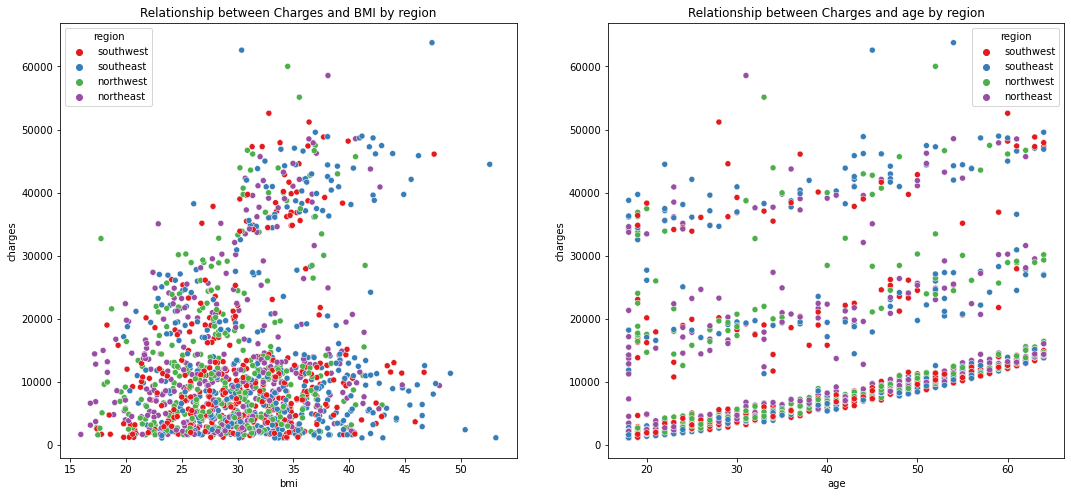

In [38]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="region", data=df, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by region")

sns.scatterplot(x="age", y="charges", hue="region", data=df, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and age by region")

The number of children does not seem to be a determining factor in clustering as well

Text(0.5, 1.0, 'Relationship between Charges and age by region')

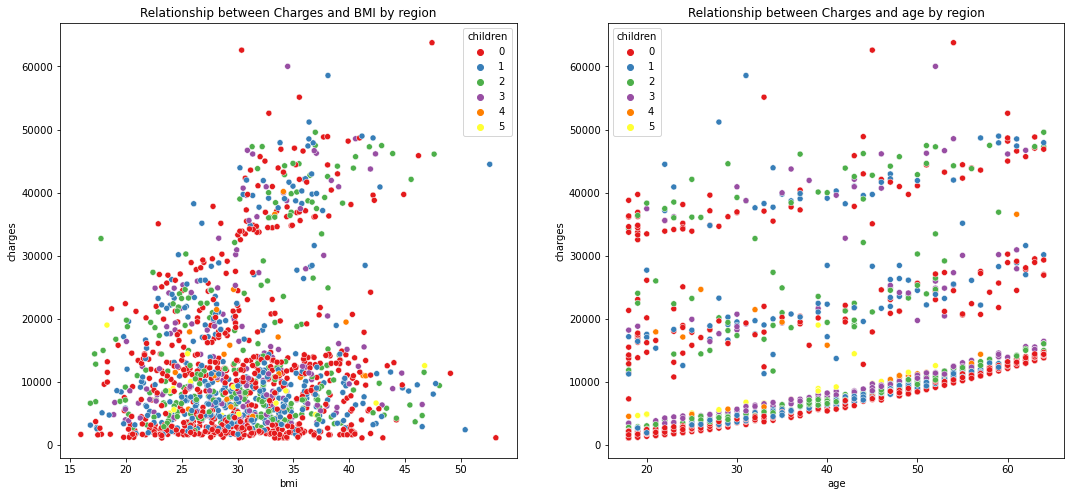

In [39]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="children", data=df, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by region")

sns.scatterplot(x="age", y="charges", hue="children", data=df, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and age by region")

Let us now preprocess the data to perform k-means clustering
1. We can use min_max scaling for numerical variables such as BMI and age to ensure fairness in the distance calculation
2. Let's try using the BMI, age, and whether or not the patient smokes as the features to be used for distance calculation

In [40]:
from sklearn.preprocessing import MinMaxScaler

df["sex"].replace('male',1, inplace=True)
df["sex"].replace('female',0, inplace=True)

#Binary encoding the smoker attribute
df["smoker"].replace('yes',1, inplace=True)
df["smoker"].replace('no',0, inplace=True)

#one hot encoding the region attribute
one_hot = pd.get_dummies(df["region"])
df = df.drop('region', axis=1)
df = df.join(one_hot)

scaler = MinMaxScaler()
df[['bmi']] = scaler.fit_transform(df[["bmi"]])
df[['age']] = scaler.fit_transform(df[["age"]])
df = df[['age','bmi','smoker','charges']]

In [41]:
df

,age,bmi,smoker,charges
0,0.021739,0.321227,1,16884.92400
1,0.000000,0.479150,0,1725.55230
2,0.217391,0.458434,0,4449.46200
3,0.326087,0.181464,0,21984.47061
4,0.304348,0.347592,0,3866.85520
...,...,...,...,...
1333,0.695652,0.403820,0,10600.54830
1334,0.000000,0.429379,0,2205.98080
1335,0.000000,0.562012,0,1629.83350
1336,0.065217,0.264730,0,2007.94500


From the elbow plot, we can observe that when K = 3 is the optimal number of clusters

C:\Users\XiaotaoO\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\XiaotaoO\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\XiaotaoO\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\XiaotaoO\AppData\Roaming\Python\Python39\site-packages\sklearn\c

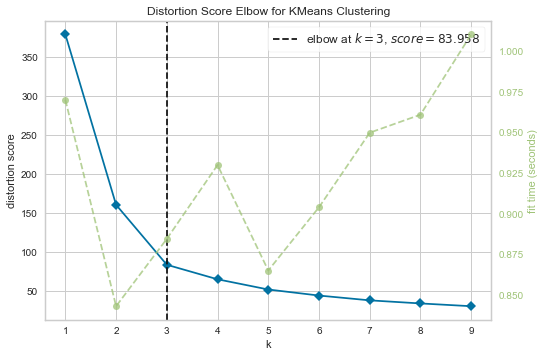

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
graph = KElbowVisualizer(model, k =(1,10))
# Lets perform the KMeans without the target variable
graph.fit(df[["age","bmi","smoker"]])
graph.poof()

In [43]:
model = KMeans(n_clusters=3)
model.fit(df[["age","bmi","smoker"]])

C:\Users\XiaotaoO\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [44]:
print(model.cluster_centers_)
print(model.labels_)

[[1.91178930e-01 3.73577741e-01 8.32667268e-17]
 [4.45969533e-01 3.96783667e-01 1.00000000e+00]
 [7.26542519e-01 4.15984685e-01 2.77555756e-17]]
[1 0 0 ... 0 0 1]


In [45]:
df["clusters"] = model.labels_
df

,age,bmi,smoker,charges,clusters
0,0.021739,0.321227,1,16884.92400,1
1,0.000000,0.479150,0,1725.55230,0
2,0.217391,0.458434,0,4449.46200,0
3,0.326087,0.181464,0,21984.47061,0
4,0.304348,0.347592,0,3866.85520,0
...,...,...,...,...,...
1333,0.695652,0.403820,0,10600.54830,2
1334,0.000000,0.429379,0,2205.98080,0
1335,0.000000,0.562012,0,1629.83350,0
1336,0.065217,0.264730,0,2007.94500,0


It seems like the clusters are quite accurate in helping us group patients according to the charges!

Text(0.5, 1.0, 'Relationship between Charges and age by region')

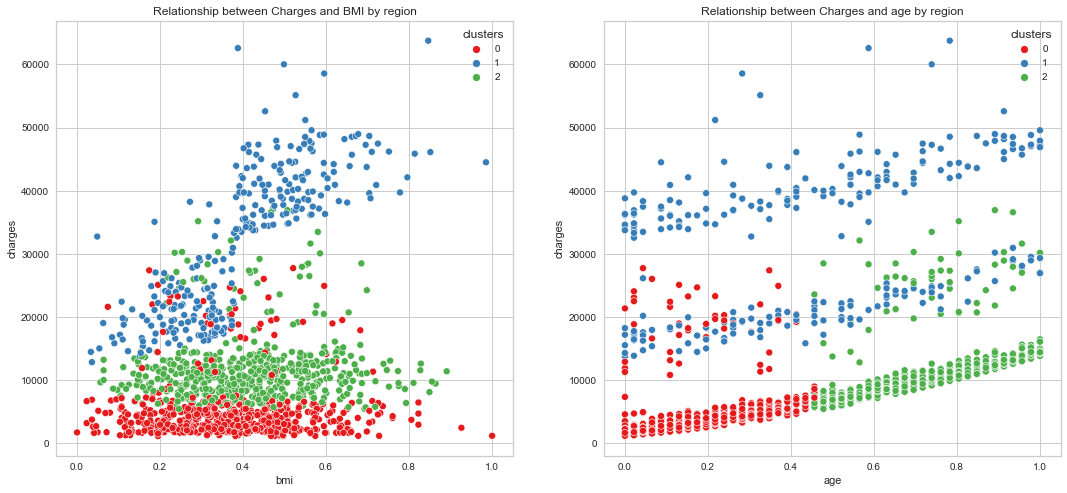

In [46]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="clusters", data=df, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by region")

sns.scatterplot(x="age", y="charges", hue="clusters", data=df, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and age by region")

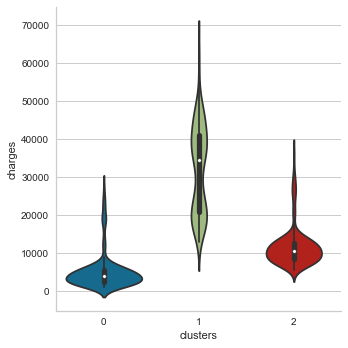

In [49]:
sns.catplot(x="clusters", y="charges",kind='violin', data=df)

Now lets try using the DBScan algorithm to see if density based clustering can perform better in performing customer segmentation

In [76]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.05,min_samples = 4)
model.fit(df[["age","bmi","smoker"]])

DBSCAN(eps=0.05, min_samples=4)

In [77]:
print(np.unique(model.labels_))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [78]:
df["db_clusters"] = model.labels_
df

,age,bmi,smoker,charges,clusters,db_clusters
0,0.021739,0.321227,1,16884.92400,1,0
1,0.000000,0.479150,0,1725.55230,0,1
2,0.217391,0.458434,0,4449.46200,0,1
3,0.326087,0.181464,0,21984.47061,0,1
4,0.304348,0.347592,0,3866.85520,0,1
...,...,...,...,...,...,...
1333,0.695652,0.403820,0,10600.54830,2,1
1334,0.000000,0.429379,0,2205.98080,0,1
1335,0.000000,0.562012,0,1629.83350,0,1
1336,0.065217,0.264730,0,2007.94500,0,1


Looks like DB Scan essentially performs the same as the smoker classification at higher epsilon values but produces trivial results as the epsilon decreases. Hence the KMeans would be the preferred method of clustering in this case.

Text(0.5, 1.0, 'Relationship between Charges and BMI by Smoker')

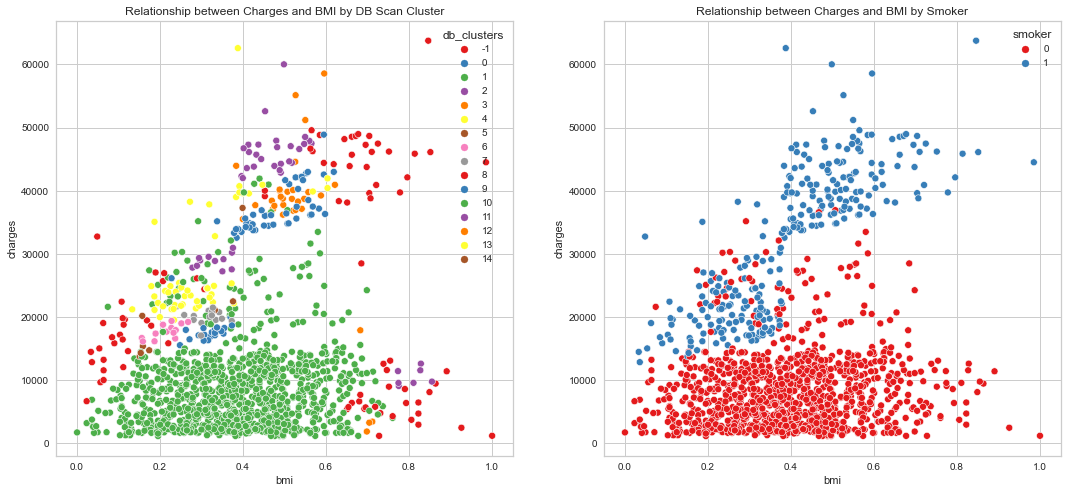

In [79]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="db_clusters", data=df, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by DB Scan Cluster")

sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and BMI by Smoker")